<a href="https://colab.research.google.com/github/HagosGithub/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unittest
import matplotlib as mpl
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

In [6]:
register_matplotlib_converters()

In [23]:
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


In [31]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [32]:
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]

In [33]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 6))

    ax = sns.lineplot(data=df, x="date", y="value")

    ax.set(
        xlabel="Date",
        ylabel="Page Views",
    )

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    return fig

In [34]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = (
        df.copy()
        .groupby(pd.Grouper(freq="M"))
        .mean()
        .rename(columns={"value": "avg"})
    )

    df_bar["year"] = pd.DatetimeIndex(df_bar.index).year
    df_bar["month"] = pd.DatetimeIndex(df_bar.index).strftime("%B")

    # Convert data to long form
    df_bar = pd.melt(
        df_bar,
        id_vars=["year", "month"],
        value_vars=["avg"],
    )

    sns.set_theme(style="ticks")

    # Draw the chart
    fig = sns.catplot(
        data=df_bar,
        x="year",
        y="value",
        hue="month",
        kind="bar",
        legend=False,
    )

    # Config legend, axes and title
    fig.set_xlabels("Years")
    fig.set_ylabels("Average Page Views")
    plt.legend(
        title="Months",
        loc="upper left",
        labels=[
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ],
    )
    return fig.fig

In [35]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().rename(columns={"value": "views"})
    df_box.reset_index(inplace=True)

    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])

    # Remember to edit the labels after call to seaborn.
    ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )

    sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["views"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )

    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    # I'm cheating here, because I don't know why the test for y ticks label
    # fail and I don't want to dig into seaborn source code.
    y_ticks = [
        "0",
        "20000",
        "40000",
        "60000",
        "80000",
        "100000",
        "120000",
        "140000",
        "160000",
        "180000",
        "200000",
    ]
    ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
    ax1.set_yticklabels(y_ticks)
    return fig

In [36]:
class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(
            actual,
            expected,
            "Expected DataFrame count after cleaning to be 1238.",
        )

In [37]:
class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(
            actual,
            expected,
            "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'",
        )

    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(
            actual, expected, "Expected line plot xlabel to be 'Date'"
        )
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(
            actual, expected, "Expected line plot ylabel to be 'Page Views'"
        )

    def test_line_plot_data_quatity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(
            actual,
            expected,
            "Expected number of data points in line plot to be 1238.",
        )

In [41]:
class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
            actual.append(label.get_text())
        expected = [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot legend labels to be months of the year.",
        )

    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(
            actual, expected, "Expected bar plot xlabel to be 'Years'"
        )
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot ylabel to be 'Average Page Views'",
        )
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ["2016", "2017", "2018", "2019"]
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'",
        )

    def test_bar_plot_number_of_bars(self):
        actual = len(
            [
                rect
                for rect in self.ax.get_children()
                if isinstance(rect, mpl.patches.Rectangle)
            ]
        )
        expected = 45
        self.assertEqual(
            actual,
            expected,
            "Expected a different number of bars in bar chart.",
        )

In [39]:
class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")

    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(
            actual, expected, "Expected box plot 1 xlabel to be 'Year'"
        )
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(
            actual, expected, "Expected box plot 1 ylabel to be 'Page Views'"
        )
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(
            actual, expected, "Expected box plot 2 xlabel to be 'Month'"
        )
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(
            actual, expected, "Expected box plot 2 ylabel to be 'Page Views'"
        )
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ["2016", "2017", "2018", "2019"]
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'",
        )
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = [
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'",
        )
        actual = []

        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = [
            "0",
            "20000",
            "40000",
            "60000",
            "80000",
            "100000",
            "120000",
            "140000",
            "160000",
            "180000",
            "200000",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'",
        )

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'",
        )
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'",
        )

    def test_box_plot_number_of_boxs(self):
        actual = len(self.ax1.lines) / 6  # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6  # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

...........
----------------------------------------------------------------------
Ran 11 tests in 4.488s

OK


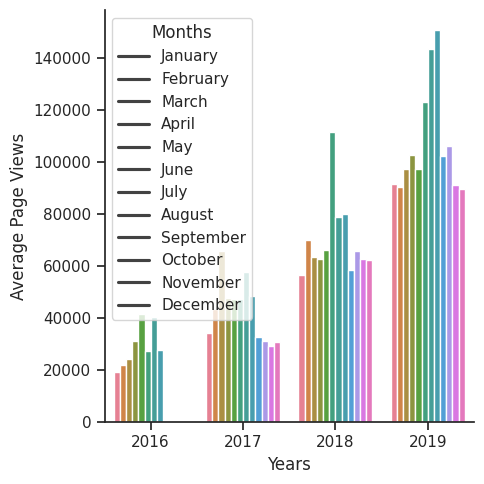

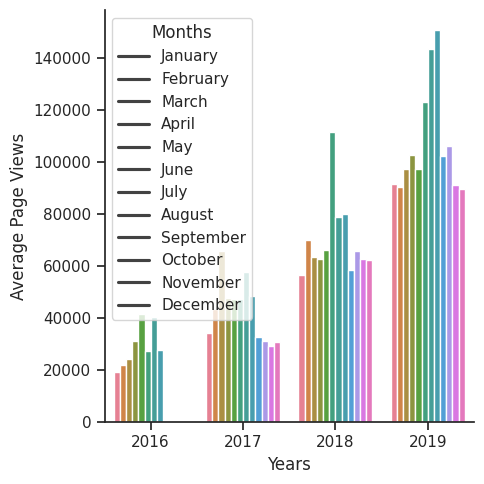

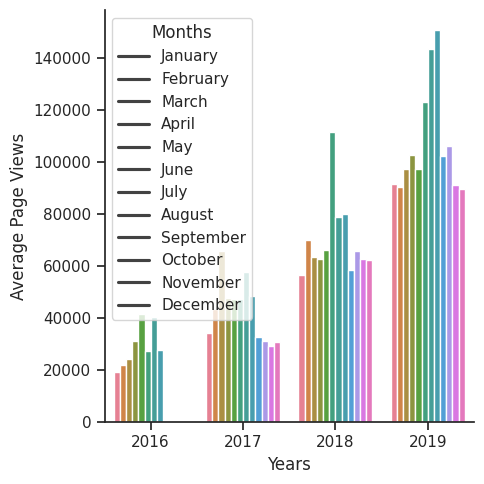

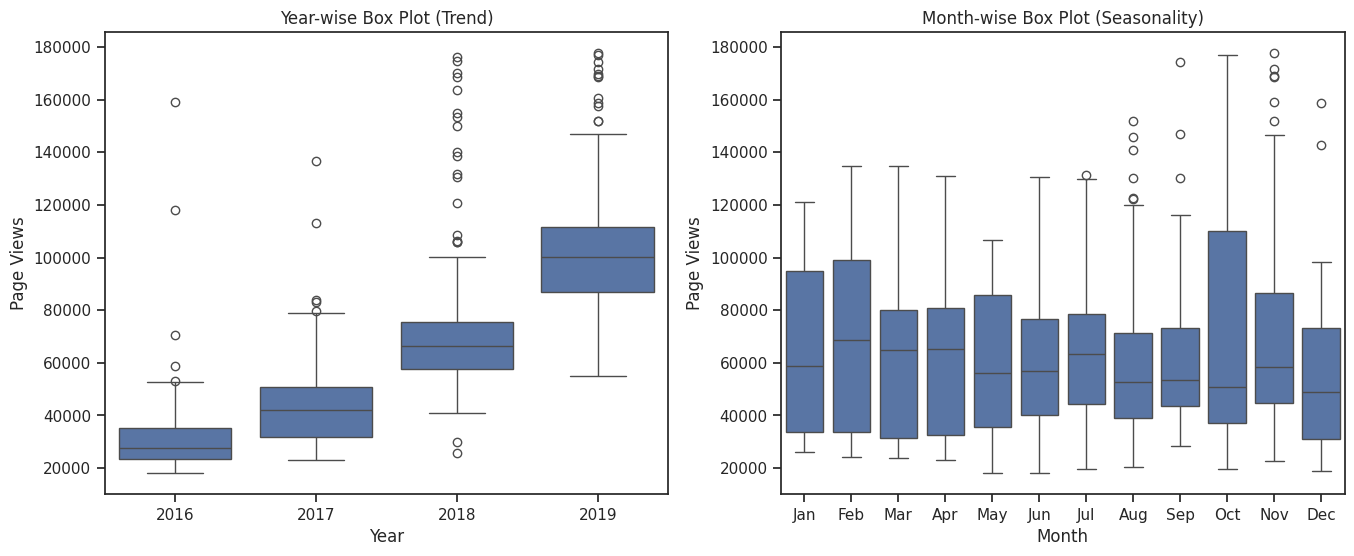

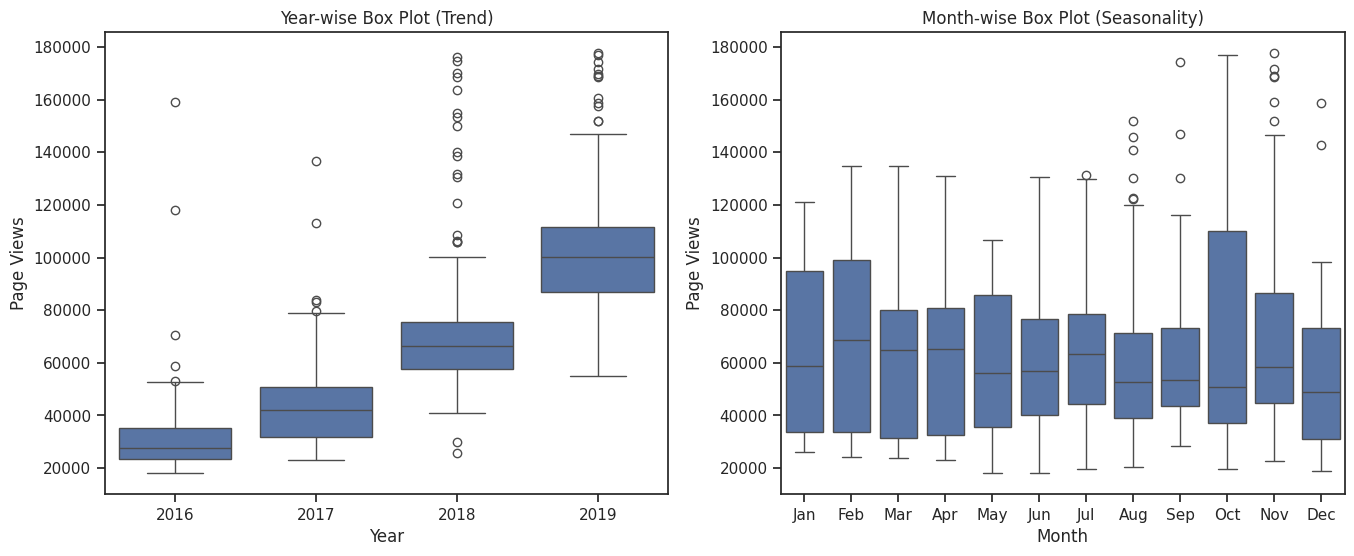

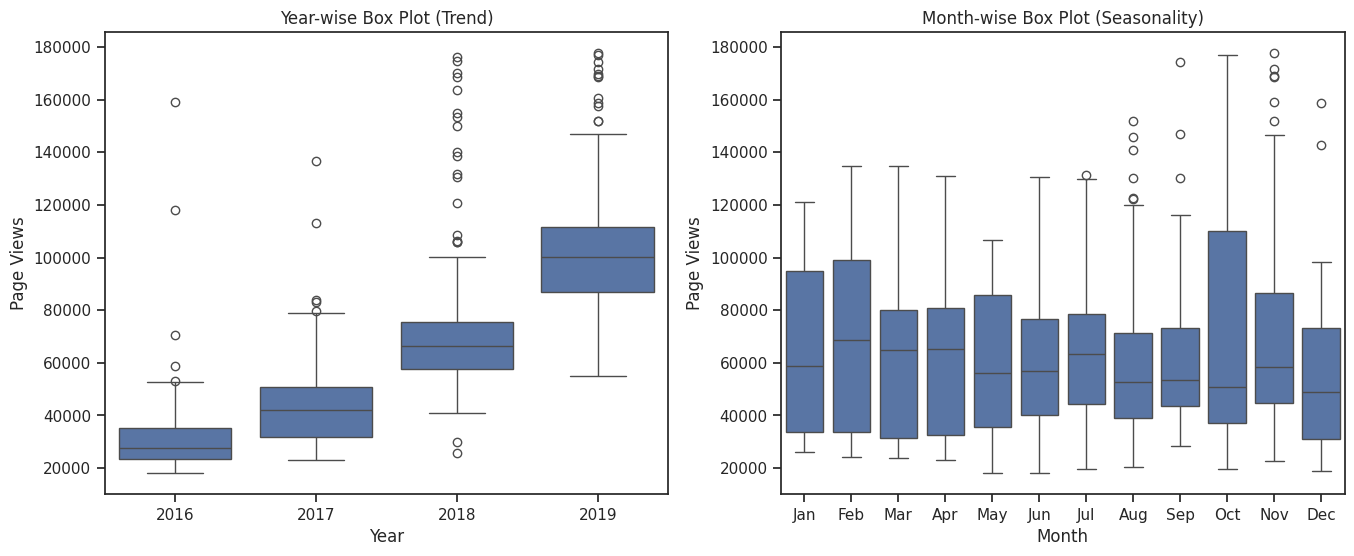

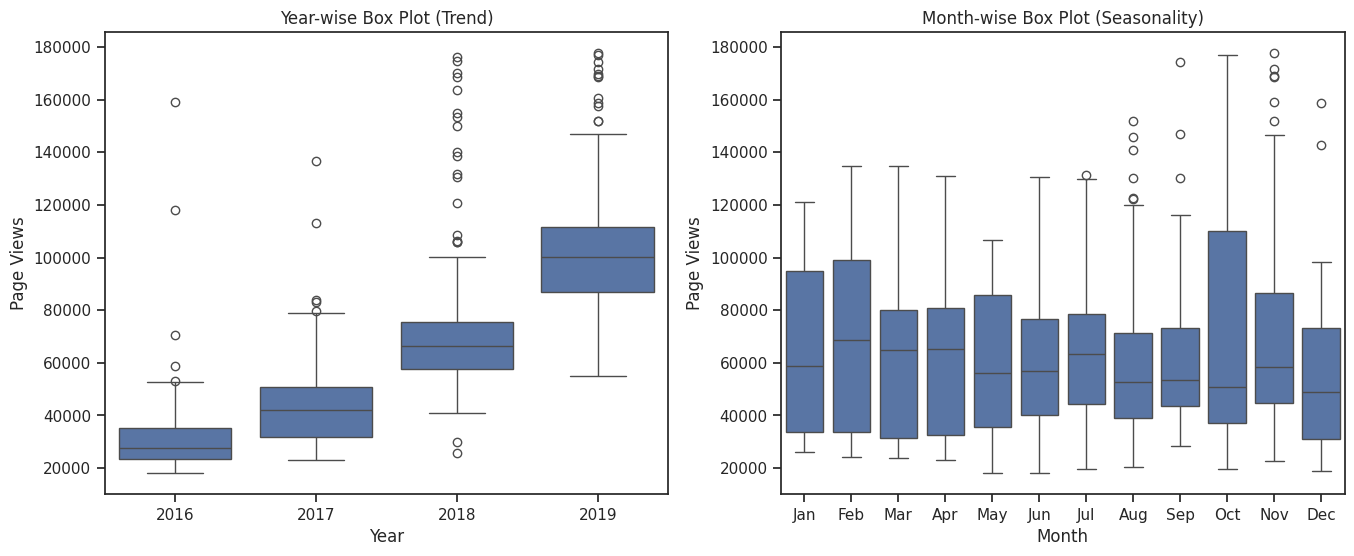

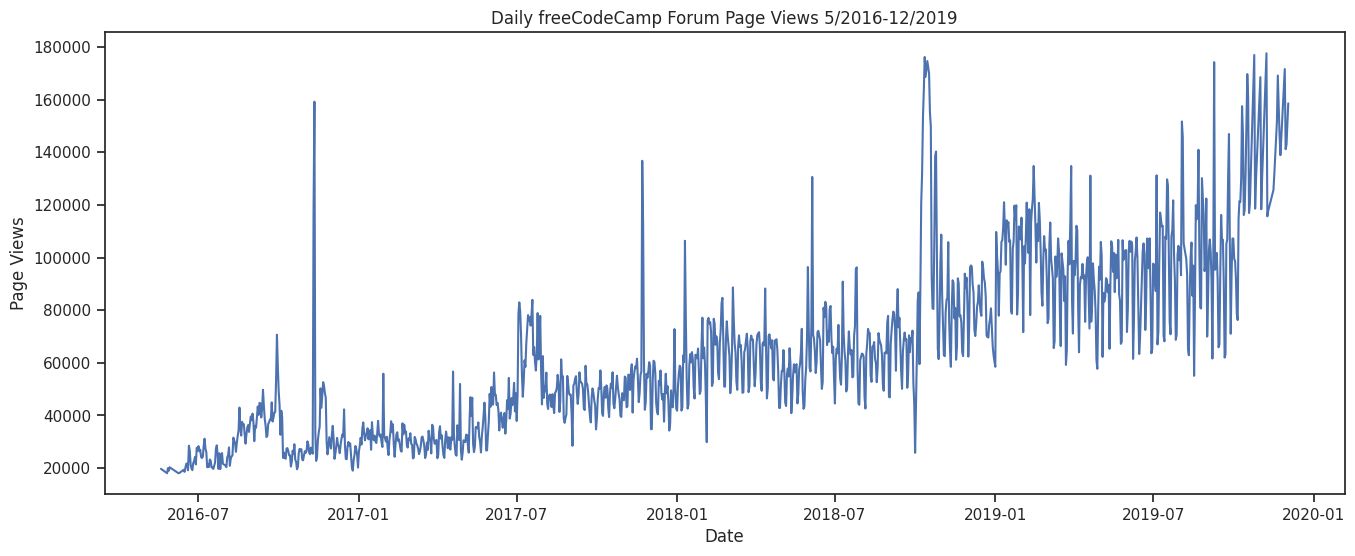

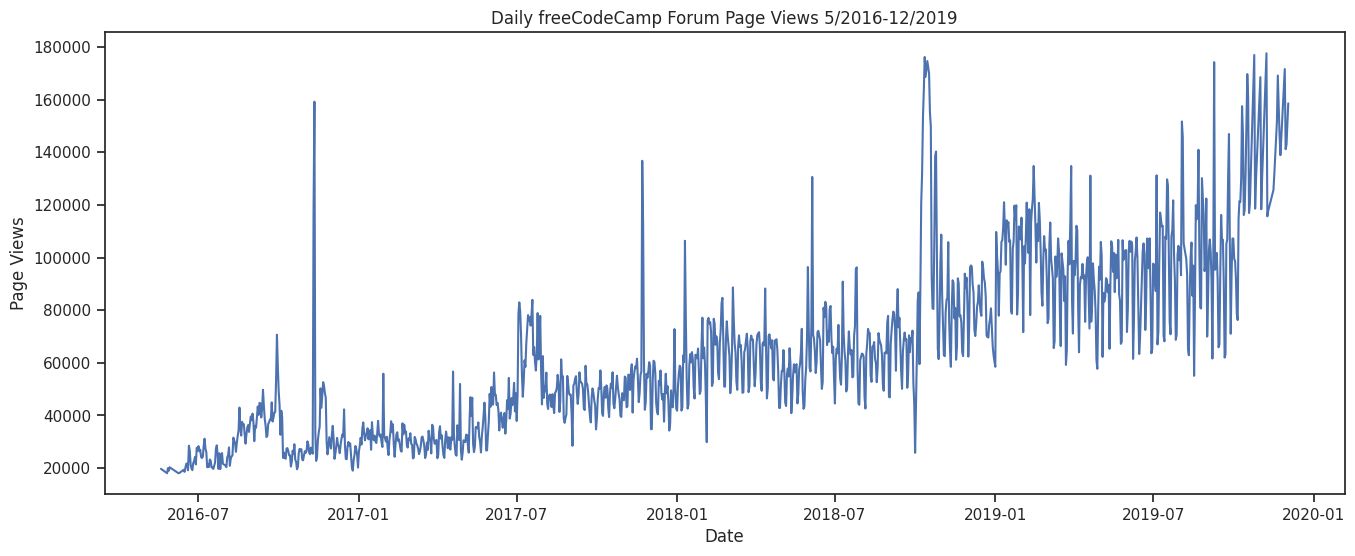

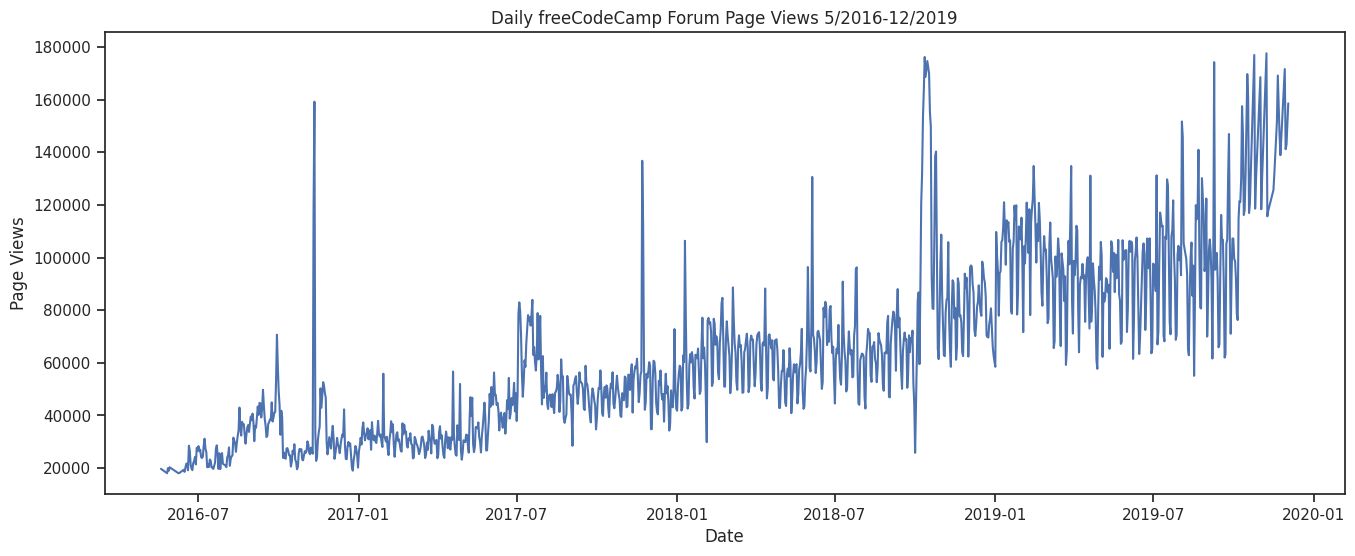

In [42]:
if __name__ == "__main__":
    unittest.main(
        argv=["first-arg-is-ignored"],
        exit=False,
    )